<a href="https://colab.research.google.com/github/brettlaw0111/GoogleColab/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [133]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #Input layer (4 features of flower) --> Hidden Layer 1 (number of neurons) --> H2 (n) --> Output (type of flower)
  #passes self, input features, 2 hidden layers with amounts of neurons, and output
  def __init__(self, in_features=4, h1=8, h2=9, out=3):
    super().__init__() #instantiate our nn.Module
    #fc1: Fully connected 1
    self.fc1 = nn.Linear(in_features, h1)
    #move from h1 to h2
    self.fc2 = nn.Linear(h1, h2)
    #move from h2 to out
    self.out = nn.Linear(h2, out)

  def forward(self, x):
    #relu: rectified linear unit. Do something, and if the output is less than 0, just call it 0
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [134]:
#Pick a random seed for randomization
torch.manual_seed(7777)

model = Model()

In [135]:
import pandas as pd
import matplotlib.pyplot
%matplotlib inline

In [136]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
#df: data frame
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [137]:
#Change from strings to numbers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-3449276879.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [138]:
#Train Test Split. Set X, y
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [139]:
#Convert to numpy arrays
X = np.array(X)
y = np.array(y)

In [140]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [141]:
#Convert x features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [142]:
#Set the criterion of the model to measure the error, ow far off predictions are from the data.
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learning rate. If error doesn't go down after many epochs, lower it
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [143]:
[model.parameters]

[<bound method Module.parameters of Model(
   (fc1): Linear(in_features=4, out_features=8, bias=True)
   (fc2): Linear(in_features=8, out_features=9, bias=True)
   (out): Linear(in_features=9, out_features=3, bias=True)
 )>]

In [144]:
#Training time
epochs = 100
losses = []
for i in range(epochs):
  #Go forth and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the loss/error, will be high at first
  loss = criterion(y_pred, y_train) #Predicted values vs y_train

  #Keep track of losses
  losses.append(loss.detach().numpy())

  #Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Back propagation time. Take the error rate of forward propagation and feed it back
  #Through the network to fine-tune weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.075554370880127
Epoch: 10 and loss: 0.8313628435134888
Epoch: 20 and loss: 0.5938445329666138
Epoch: 30 and loss: 0.39504238963127136
Epoch: 40 and loss: 0.21563315391540527
Epoch: 50 and loss: 0.11549507826566696
Epoch: 60 and loss: 0.07029172033071518
Epoch: 70 and loss: 0.051985256373882294
Epoch: 80 and loss: 0.042448364198207855
Epoch: 90 and loss: 0.036495838314294815


Text(0.5, 0, 'Epoch')

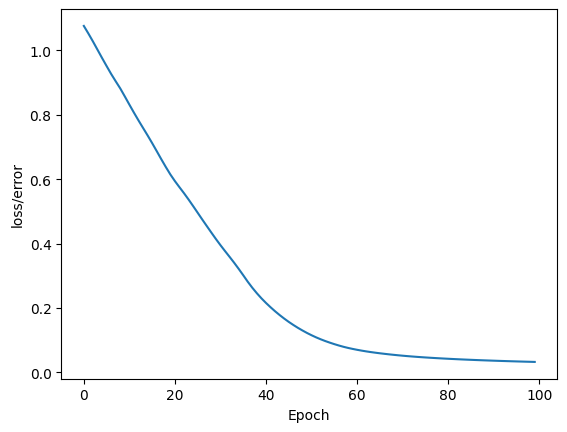

In [145]:
#Graph dat junk
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [146]:
#Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): #Turn off back propagation
  y_eval = model.forward(X_test)  #X_test are features from the test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) #Find the loss or error

In [147]:
loss

tensor(0.1504)

In [149]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if _test[i] == 0:
      x = "setosa"
    elif y_test[i] == 1:
      x = 'versicolor'
    else:
      x = 'virginica'

    #Print the type our network thinks the flower is
    #Highest number is what our network believes the flower to be. 0, 1 or 2
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')

    #Correct or nah
    if y_val.argmax().item() == y_test[i]:
      correct += 1
  print(f'We got {correct} correct.')


1.) tensor([-5.7914,  2.3054,  6.7313]) 	 2 	 2
2.) tensor([-7.4201,  0.8539, 10.0229]) 	 2 	 2
3.) tensor([-7.8888,  1.7088, 10.2052]) 	 2 	 2
4.) tensor([-2.0855,  5.9307, -0.1132]) 	 1 	 1
5.) tensor([-6.7138,  2.2641,  8.2895]) 	 2 	 2
6.) tensor([-0.0608,  6.2133, -2.9687]) 	 1 	 1
7.) tensor([-5.0336,  3.2608,  5.3823]) 	 2 	 2
8.) tensor([-1.8175,  6.1956, -0.5066]) 	 1 	 1
9.) tensor([-5.8207,  2.8350,  6.7527]) 	 2 	 2
10.) tensor([-7.8506,  1.0127, 10.5743]) 	 2 	 2
11.) tensor([-4.6933,  3.5856,  4.7616]) 	 2 	 2
12.) tensor([ 13.1122,   6.3311, -20.5074]) 	 0 	 0
13.) tensor([ 11.4664,   5.7502, -18.0915]) 	 0 	 0
14.) tensor([ 0.4019,  5.4625, -3.3806]) 	 1 	 1
15.) tensor([ 11.2310,   6.0486, -17.9542]) 	 0 	 0
16.) tensor([-4.2627,  4.1280,  3.7660]) 	 2 	 1
17.) tensor([ 11.5710,   5.9858, -18.4401]) 	 0 	 0
18.) tensor([-5.3973,  2.8796,  5.9633]) 	 1 	 2
19.) tensor([ 12.3416,   6.1562, -19.4723]) 	 0 	 0
20.) tensor([  9.6856,   5.4428, -15.7241]) 	 0 	 0
21.) tensor